# 精度指標

## 混合行列

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

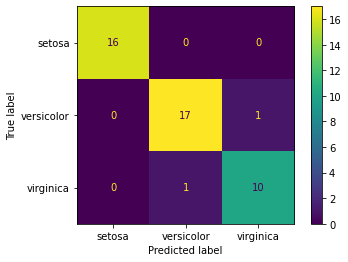

In [14]:
#データロード
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# モデル学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 混合行列
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## Accuracy

In [23]:
from sklearn.metrics import accuracy_score

# サンプル
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 1, 0, 0, 1]

accuracy_score(y_true, y_pred)

0.5

## Precision

In [24]:
from sklearn.metrics import precision_score


# サンプル
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 1, 0, 0, 1]

precision_score(y_true, y_pred)

0.6

## Recall

In [25]:
from sklearn.metrics import recall_score

# サンプル
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 1, 0, 0, 1]

recall_score(y_true, y_pred)

0.6

## Specificity

In [26]:
import numpy as np

y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 1, 0, 0, 1]

recall_score(np.array(y_true)!=1, np.array(y_pred)!=1)

0.3333333333333333

## 多クラス分類の評価　macro平均/micro平均

In [29]:
from sklearn.metrics import precision_score

#データロード
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# モデル学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
# average-None
print(precision_score(y_test, y_pred, average=None))

# average-Macro
print(precision_score(y_test, y_pred, average='macro'))

# average-Micro
print(precision_score(y_test, y_pred, average='micro'))

# accuracy
print(accuracy_score(y_test, y_pred))

[1.         0.94444444 0.90909091]
0.9511784511784511
0.9555555555555556
0.9555555555555556


## Precision-Recall Curve

In [43]:
from sklearn.metrics import precision_recall_curve
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/heart_preprocessed.csv')

# データ準備
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#modelの構築
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [44]:
# thresholdsはしきい値
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

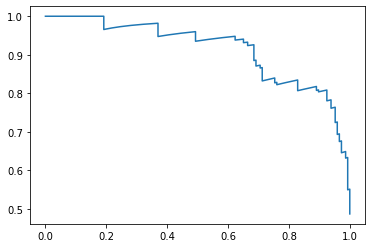

In [46]:
plt.plot(recall, precision)

 ## F値

In [51]:
from sklearn.metrics import f1_score, recall_score, precision_score

y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]

f1_score(y_true, y_pred)

0.6

In [53]:
# 調和平均
from scipy.stats import hmean
hmean([recall_score(y_true, y_pred), precision_score(y_true, y_pred)])

0.6

## F値の推移

In [56]:
# それぞれの行のprecision, recallをタプルで返す
# list(zip(precision, recall))

f1_scores = [hmean([p, r])for p, r in zip(precision, recall)]

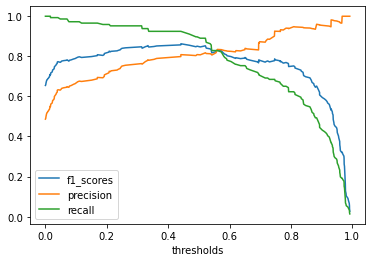

In [62]:
# 0,1があるためthreshholdsだけ要素が1多い
plt.plot(thresholds, f1_scores[:-1], label='f1_scores')
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.xlabel('thresholds')
plt.legend()

In [64]:
np.argmax(f1_scores)
thresholds[np.argmax(f1_scores)]

0.4416458143760564

 ## ROC

Text(0, 0.5, 'sensitivity(TPR)')

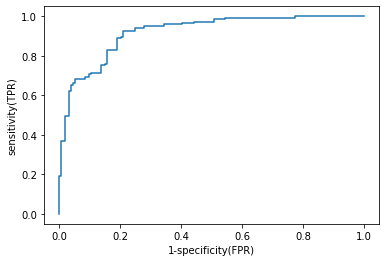

In [70]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot(fpr, tpr)
plt.xlabel('1-specificity(FPR)')
plt.ylabel('sensitivity(TPR)')

## AUC

In [72]:
from sklearn.metrics import aucc

auc(fpr, tpr)

ImportError: cannot import name 'aucc' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/__init__.py)